In [10]:
# prompt: open image from files here on colab with a direct file path

img = open('/content/sun_512_0094.jpg')
print(img)

<_io.TextIOWrapper name='/content/sun_512_0094.jpg' mode='r' encoding='UTF-8'>


In [11]:
from matplotlib import pyplot as plt

In [12]:
import numpy as np

In [5]:
import matplotlib.image as mpimg

In [13]:
#Load the image file
img =mpimg.imread('/content/sun_512_0131.jpg')

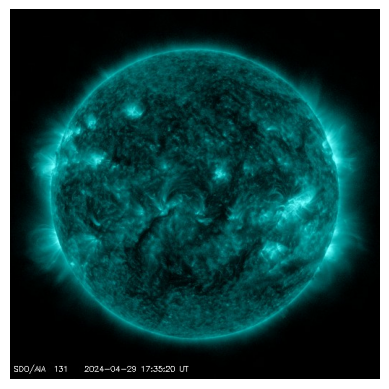

In [14]:
#dISPLAY THE IMAGE
plt.imshow(img)
plt.axis('off')
plt.show()


In [43]:
print(img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
# prompt: open image from files here on colab with a direct file path

#Load the image file
img =mpimg.imread('/content/sun_512_0131.jpg')

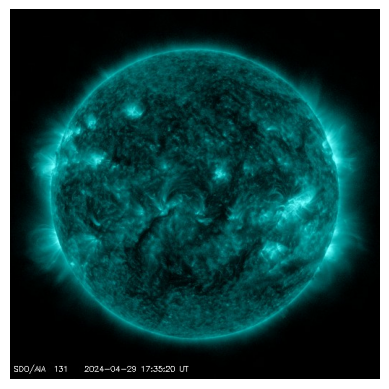

In [17]:
#dISPLAY THE IMAGE
plt.imshow(img)
plt.axis('off')
plt.show()


In [18]:
import cv2 # Importing OpenCV library'
#python library for openCV (Open source computer vision)

In [19]:
img = cv2.imread('/content/sun_512_0094.jpg', cv2.IMREAD_GRAYSCALE)

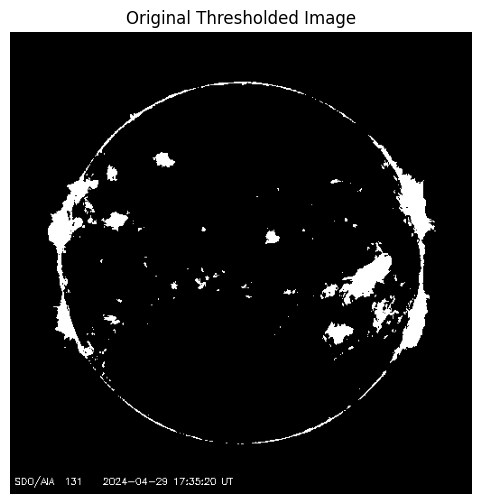

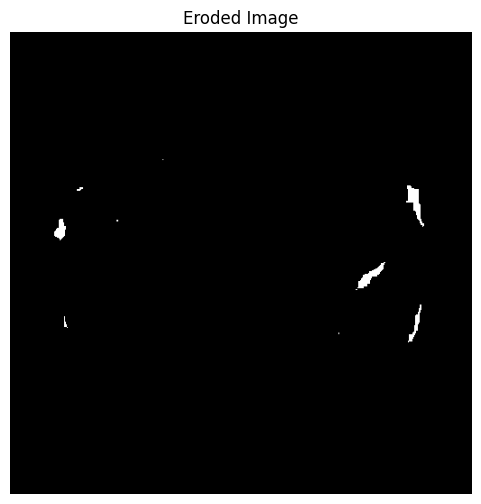

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('/content/sun_512_0131.jpg', cv2.IMREAD_GRAYSCALE)

# Define a threshold value to create a binary image
threshold_value = 100
_, thresholded_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original thresholded image
plt.figure(figsize=(6, 6))
plt.imshow(thresholded_img, cmap='gray')
plt.title('Original Thresholded Image')
plt.axis('off')
plt.show()

# Define the erosion size -- the amount of pixels you want to erode
erosion_size = 12

# Create the structuring element
element = cv2.getStructuringElement(cv2.MORPH_RECT, (erosion_size, erosion_size))

# Perform erosion
eroded_img = cv2.erode(thresholded_img, element, iterations=1)

# Display the eroded image
plt.figure(figsize=(6, 6))
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()


Now that we know regions of dark and bright, can do blob detection.

Blob detection is a technique to detect regions in an image that differ in properties, like brightness or color, compared to surrounding regions

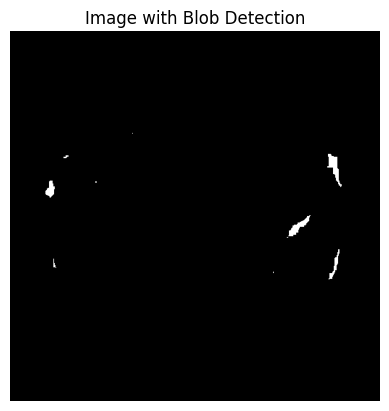

Detected blobs:


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Set up the detector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Set blob detection parameters
params.filterByArea = True

params.minThreshold = 1
params.maxThreshold = 2000

params.minArea = 1 # minimum area of the blobs to be detected
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(eroded_img)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
blank = np.zeros((1, 1))
blobs = cv2.drawKeypoints(eroded_img, keypoints, blank, (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
plt.imshow(cv2.cvtColor(blobs, cv2.COLOR_BGR2RGB))
plt.title('Image with Blob Detection')
plt.axis('off')
plt.show()

# Print information about the blobs
print("Detected blobs:")
for i, keypoint in enumerate(keypoints):
    print(f"Blob {i+1}:")
    print(f" - Position: {keypoint.pt}")
    print(f" - Size (diameter): {keypoint.size}")


Detected contours with area greater than 50:
Contour 1:
 - Centroid coordinates: (448, 324)
 - Area: 112.5
Contour 2:
 - Centroid coordinates: (398, 270)
 - Area: 240.0
Contour 3:
 - Centroid coordinates: (55, 219)
 - Area: 157.5
Contour 4:
 - Centroid coordinates: (448, 187)
 - Area: 287.0


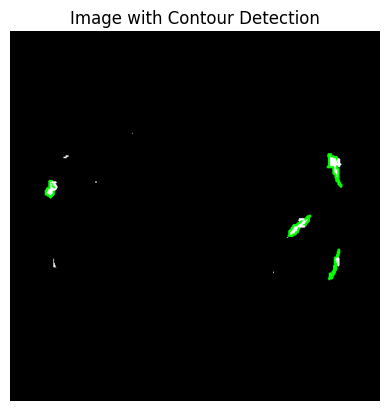

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the binary image (assumed to be the eroded and thresholded image)
# Replace the string with the path to your actual image file
binary_img = eroded_img

# Find contours in the binary image
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original image (if it's grayscale, convert it to BGR first)
contour_img = cv2.cvtColor(binary_img, cv2.COLOR_GRAY2BGR)

# Filter contours by area and draw
filtered_contours = [c for c in contours if cv2.contourArea(c) > 50]
cv2.drawContours(contour_img, filtered_contours, -1, (0, 255, 0), 2)

# Calculate and print the centroid coordinates of the filtered contours
print("Detected contours with area greater than 50:")
for i, contour in enumerate(filtered_contours):
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print(f"Contour {i+1}:")
        print(f" - Centroid coordinates: ({cX}, {cY})")
        print(f" - Area: {cv2.contourArea(contour)}")

        # Draw the contour number near the centroid
        cv2.putText(contour_img, f"{i+1}", (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Show the image with contours
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Image with Contour Detection')
plt.axis('off')
plt.show()


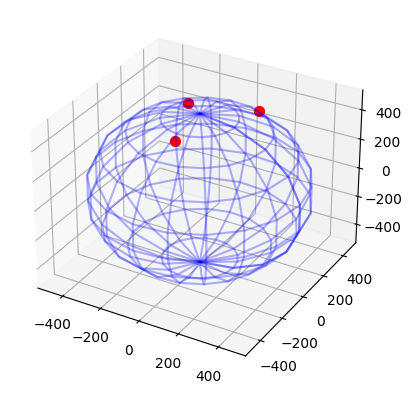

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def map_to_sphere(x, y, img_width, img_height):
    # Assuming the center of the image is the center of the sphere
    r = img_width / 2  # Radius of the sphere
    # Normalize x, y coordinates to [-1, 1]
    x_normalized = (x - img_width / 2) / r
    y_normalized = (y - img_height / 2) / r

    # Calculate corresponding z on the sphere's surface
    z = np.sqrt(r**2 - (x_normalized**2) * r**2 - (y_normalized**2) * r**2)

    # Convert to spherical coordinates
    theta = np.arccos(z / r)  # Polar angle
    phi = np.arctan2(y_normalized, x_normalized)  # Azimuthal angle

    return r, theta, phi

def plot_on_sphere(coordinates, r):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-r, r])
    ax.set_ylim([-r, r])
    ax.set_zlim([-r, r])

    # Draw sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = r * np.cos(u) * np.sin(v)
    y = r * np.sin(u) * np.sin(v)
    z = r * np.cos(v)
    ax.plot_wireframe(x, y, z, color="b", alpha=0.3)

    # Plot points
    for r, theta, phi in coordinates:
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)
        ax.scatter(x, y, z, color='r', s=50)

    plt.show()

# Example Usage
img_width = 1024  # Example image dimensions
img_height = 1024
contours = [(512, 300), (400, 600), (650, 800)]  # Example detected contours

spherical_coords = [map_to_sphere(x, y, img_width, img_height) for x, y in contours]
plot_on_sphere(spherical_coords, img_width / 2)


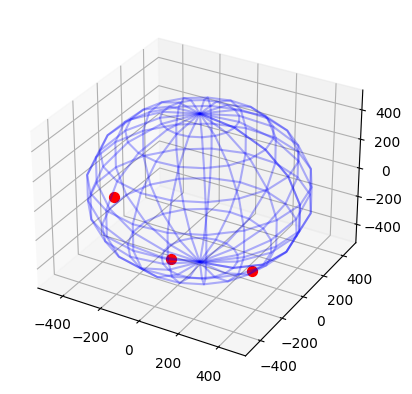

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def map_to_sphere(x, y, img_width, img_height):
    # Assuming the center of the image is the center of the sphere
    r = img_width / 2  # Radius of the sphere
    # Normalize x, y coordinates to [-1, 1]
    x_normalized = (x - img_width / 2) / r
    y_normalized = (y - img_height / 2) / r

    # Calculate corresponding z on the sphere's surface
    # Adjust z to wrap around the sphere correctly
    z = np.sqrt(max(0, r**2 - (x_normalized**2) * r**2 - (y_normalized**2) * r**2))
    if x > img_width / 2:  # Points on the right side should map towards the back of the sphere
        z = -z
    if x < img_width / 2:  # Points on the left side should map more towards the back
        z = -z

    # Convert to spherical coordinates
    theta = np.arccos(z / r)  # Polar angle
    phi = np.arctan2(y_normalized, x_normalized)  # Azimuthal angle

    return r, theta, phi

def plot_on_sphere(coordinates, r):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-r, r])
    ax.set_ylim([-r, r])
    ax.set_zlim([-r, r])

    # Draw sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = r * np.cos(u) * np.sin(v)
    y = r * np.sin(u) * np.sin(v)
    z = r * np.cos(v)
    ax.plot_wireframe(x, y, z, color="b", alpha=0.3)

    # Plot points
    for r, theta, phi in coordinates:
        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)
        z = r * np.cos(theta)
        ax.scatter(x, y, z, color='r', s=50)

    plt.show()

# Example Usage
img_width = 1024  # Example image dimensions
img_height = 1024
contours = [(55, 512), (398, 448), (900, 300)]  # Example detected contours with adjustments

spherical_coords = [map_to_sphere(x, y, img_width, img_height) for x, y in contours]
plot_on_sphere(spherical_coords, img_width / 2)


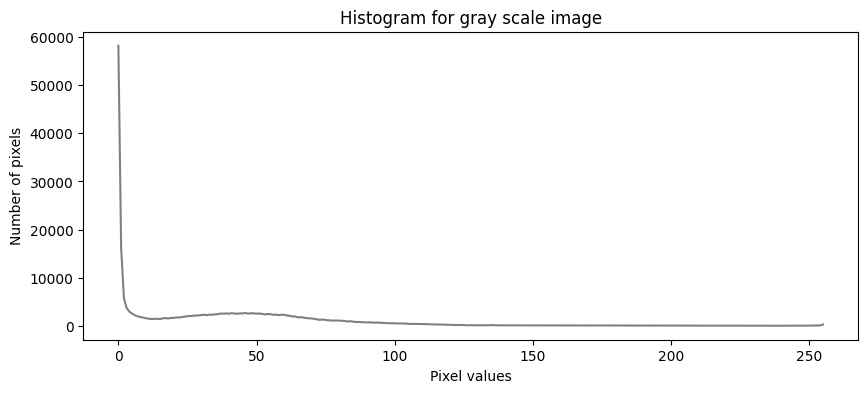

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = None
# Load the image in grayscale
img = cv2.imread('/content/sun_512_0131.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram for the image
# The second parameter is the number of bins (256 for grayscale images)
# The third parameter is the range of possible pixel values
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(10, 4))

# Plotting the histogram
plt.plot(hist, color='gray')
plt.title('Histogram for gray scale image')
plt.xlabel('Pixel values')
plt.ylabel('Number of pixels')

# Show the histogram
plt.show()

# Define a threshold value. This may need to be adjusted to suit your specific image.
threshold_value = 150  # Adjust this value based on your


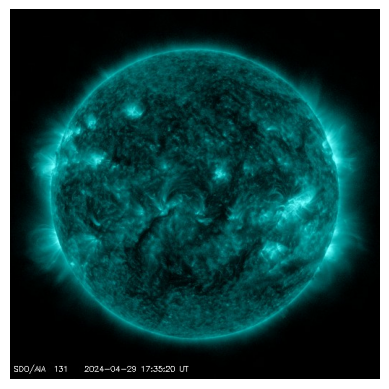

Detected contours with area greater than 50:
Contour 1:
 - Centroid coordinates: (448, 324)
 - Area: 112.5
Contour 2:
 - Centroid coordinates: (398, 270)
 - Area: 240.0
Contour 3:
 - Centroid coordinates: (55, 219)
 - Area: 157.5
Contour 4:
 - Centroid coordinates: (448, 187)
 - Area: 287.0


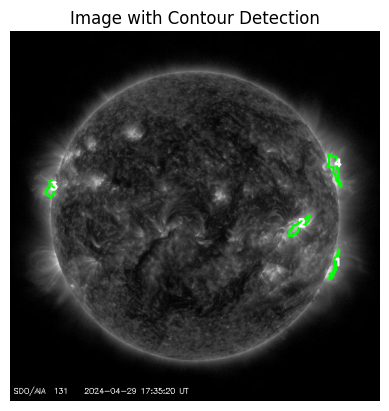

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the original image
original_img = mpimg.imread('/content/sun_512_0131.jpg')

# Display the original image
plt.imshow(original_img)
plt.axis('off')
plt.show()

# Load the image in grayscale
img = cv2.imread('/content/sun_512_0131.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold the image
threshold_value = 100
_, thresholded_img = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)

# Erosion settings
erosion_size = 12
element = cv2.getStructuringElement(cv2.MORPH_RECT, (erosion_size, erosion_size))
eroded_img = cv2.erode(thresholded_img, element, iterations=1)

# Find contours in the eroded image
contours, _ = cv2.findContours(eroded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR for contour drawing

# Draw and annotate contours
filtered_contours = [c for c in contours if cv2.contourArea(c) > 50]
cv2.drawContours(contour_img, filtered_contours, -1, (0, 255, 0), 2)

print("Detected contours with area greater than 50:")
for i, contour in enumerate(filtered_contours):
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        print(f"Contour {i+1}:")
        print(f" - Centroid coordinates: ({cX}, {cY})")
        print(f" - Area: {cv2.contourArea(contour)}")
        cv2.putText(contour_img, f"{i+1}", (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Show the image with drawn contours
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Image with Contour Detection')
plt.axis('off')
plt.show()


**Step 2 - Preprocessing the image**

The goal here is to reduce noise and impriove the robustness of the edge detection step that will follow

In [20]:
#Apply Gaussian Blurr to smooth the image and reduce noise
# The (7,7) defines the size of the Gaussian kernel. The numbers should be odd
# The standard deviation (sigmaX value) is set to 0, which means it is calculated based ont  the kernel size

blurred_img = cv2.GaussianBlur(img, (3,3), 0)

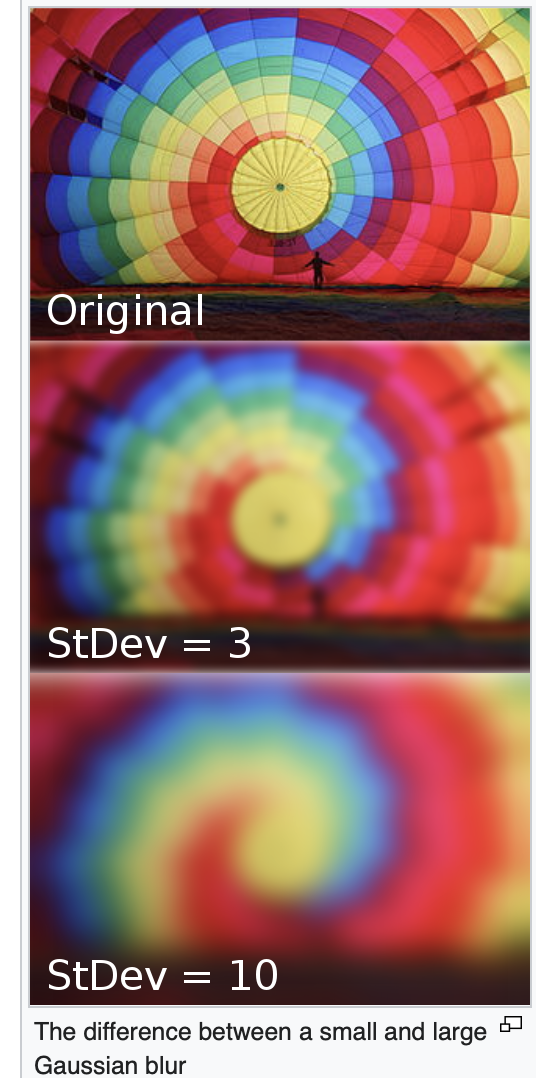In image processing, a Gaussina blur also known as Gaussian smoothing is the result of blkurring an image by a Gaussian function. Used to reduce image noise and reduce detail. The visual efect of this blurring technique is a smooth blur resembling that of viewing the image through a translucent screen.

Gaussian smoothing is also used as a pre-processing stage in computer vision algorithms in order to enhance image structures at dif

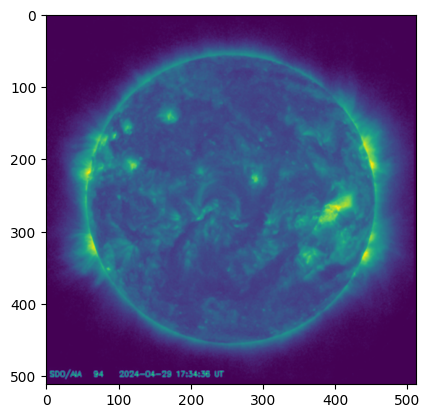

In [21]:
plt.imshow(blurred_img)
plt.show()

**Step 3 - Edge Detection**
Canny edge detection is an edge detection operator that uses a multi stage algotihm to detect a wide range of edges in images

Gaussian smoothing is commonly used with edge detection. Most edge-detection algorithms are sensitive to noise- the 2-D Laplacian filter, built from a discretization of the laplace operator, is highly sensistive to noisy environemnts.

Using a Gaussian Blur filter before edge detection aims to reduce the level of noise in the image, which improves the result of the following edge-detection algorithm. This approach is commonly referred to as Laplacian of Gaussian, or LoG filtering.[8]

In [22]:
# Use canny edge detection
# the first parameter is the blurred image
# the second and third parameters are the low and high threshold values for edge linking

edges = cv2.Canny(blurred_img, 50, 150)

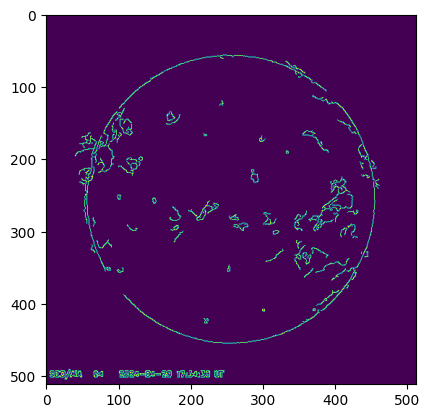

In [23]:
plt.imshow(edges)
plt.show()

**Step 4. - Circle Detection**
Will use the Hough Circle transform from OpenCV to detect circles in the image

In [24]:
# Hough Circle detection
# The parameters include the image, the method, dp, minDist, and high threshold to the Canny edge detector (set here the same as before)
# The next parameters are for the accumulator threshold for the circle centers at the detection stage, the minimum radius, and the maximum radius of the circles to detect
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=100, param1=150, param2=30, minRadius=40, maxRadius=200)

# Convert the output (x, y, radius) from float to integer
circles = np.uint16(np.around(circles))


In [25]:
# Hough Circle detection
detected_circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=100,
                                    param1=150, param2=30, minRadius=150, maxRadius=2000)

# If some circles are detected, convert the output (x, y, radius) from float to integer
if detected_circles is not None:
    circles = np.uint16(np.around(detected_circles))
    print(f"Detected circles: {circles}")
else:
    print("No circles were detected.")


Detected circles: [[[254 254 199]
  [392 498 226]]]


In [34]:
# Assuming circles is a 3D array with the shape (1, N, 3) where N is the number of circles
if detected_circles is not None:
    # Convert the (x, y, radius) values from float to int
    circles = np.uint16(np.around(detected_circles[0, :]))

    # Extract the largest circle
    largest_circle = max(circles, key=lambda x: x[2])  # x[2] is the radius
    print(f"Largest Circle: center at ({largest_circle[0]}, {largest_circle[1]}) with radius {largest_circle[2]}")


Largest Circle: center at (392, 498) with radius 226


**Within boundary analysis**

In [28]:
# Assuming you have the original color image in a variable called `original_img`
# and the largest_circle with [x, y, radius]

# Create a mask with the same dimensions as the image, initialized to black
mask = np.zeros_like(img)

# Draw the circle on the mask using the largest_circle parameters and fill it white
cv2.circle(mask, (largest_circle[0], largest_circle[1]), largest_circle[2], (255, 255, 255), -1)

# Apply the mask to get the sun's region
sun_img = cv2.bitwise_and(img, mask)
